Questo esempio è inutile perché i dataset è troppo piccolo...

In [1]:
%run -i 'functions.py'
%run -i 'encode_csv.py'

Using TensorFlow backend.


In [59]:
# # number of random samples
# def samples(train_data):
# #     samples = len(train_data)//60 * np.arange(1,10)
#     samples = 30 * np.arange(1,9)
#     return(samples)

In [2]:
leaf = pd.read_csv('../datasets/leaf.csv')

In [3]:
leaf.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [62]:
X = leaf.drop(['species', 'id'], axis=1) 
le = LabelEncoder().fit(leaf['species']) 
y = le.transform(leaf['species'])

# encode data
encoded, encoders = number_encode_features(X)

# scale columns between -1 and 1
X = scale_columns(X)

X.head()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,-0.109230,-0.024875,-0.054719,-0.114016,-0.022857,-0.092781,0.088699,-0.034657,-0.068453,0.149131,...,-0.066766,-0.024852,-0.075289,-0.043235,0.178935,-0.024246,-0.017758,-0.040981,-0.103428,0.042169
1,-0.131451,-0.139162,-0.004722,-0.045048,0.099949,-0.117940,0.003587,-0.034657,-0.094093,-0.110874,...,-0.082673,-0.024852,-0.092240,-0.052990,0.068855,-0.024246,-0.017758,-0.051369,0.346005,0.021477
2,-0.131451,-0.091541,-0.079724,-0.091029,-0.093036,-0.105362,0.535500,-0.034657,-0.094093,0.269134,...,0.274149,-0.024852,-0.058343,-0.052990,-0.077937,-0.024246,-0.017758,-0.053968,0.132530,-0.116454
3,-0.198113,-0.120115,-0.054719,-0.102522,0.064855,-0.061337,0.046148,-0.034657,0.085396,-0.010870,...,-0.084947,-0.020019,-0.092240,-0.057870,0.041331,-0.024246,-0.017758,-0.007215,-0.103428,0.200792
4,-0.131451,-0.120115,0.107777,-0.079529,-0.005315,-0.073915,-0.145351,-0.034657,-0.094093,-0.130873,...,0.140053,-0.024852,0.032053,-0.057870,-0.151323,-0.024246,-0.017758,-0.053968,-0.103428,0.083546


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
print("train:", len(X_train), ", test:", len(X_test))

train: 792 , test: 198


In [64]:
leaf_fit = fit_all(X_train, y_train, X_test, y_test)


kernel svm fitting

linear svm fitting

nystroem svm fitting

 30 / 240 samples

 60 / 240 samples

 90 / 240 samples

 120 / 240 samples

 150 / 240 samples

 180 / 240 samples

 210 / 240 samples

 240 / 240 samples

fourier svm fitting

 30 / 240 samples

 60 / 240 samples

 90 / 240 samples

 120 / 240 samples

 150 / 240 samples

 180 / 240 samples

 210 / 240 samples

 240 / 240 samples


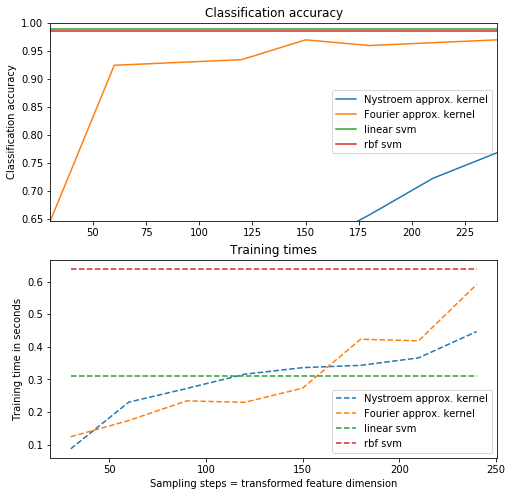

In [65]:
save(leaf_fit, 'adult')
plot_results(leaf_fit)

perché nystroem va così male? dataset troppo piccolo...